####Organın iyi Göründüğü Üç Farklı Img'nin Gösterilmesi####



3 test görüntüsü yüklendi.
3 test maskesi yüklendi.


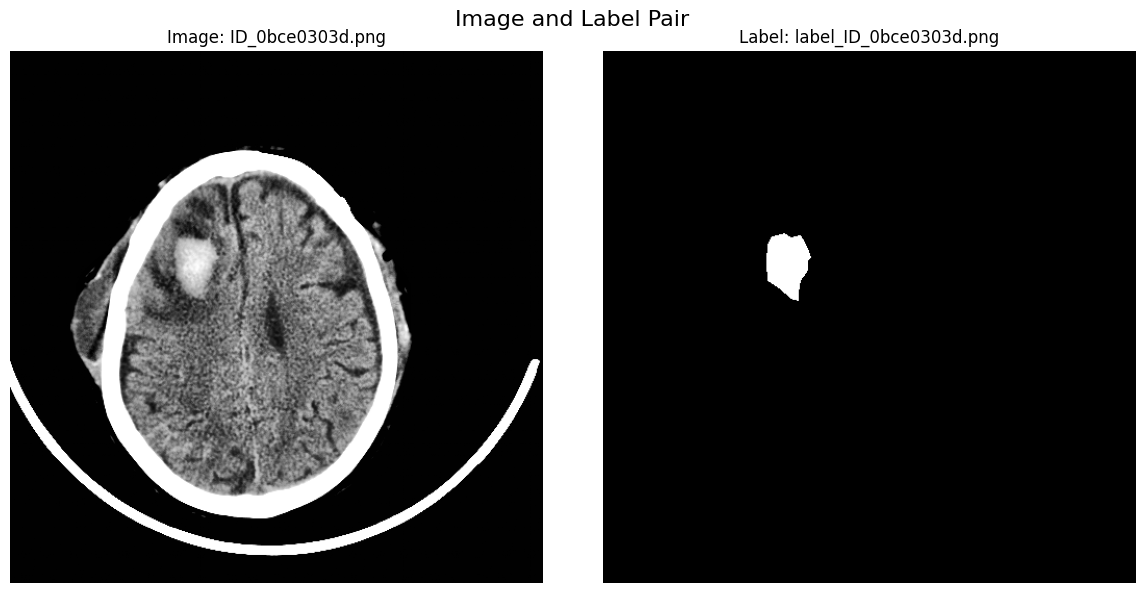

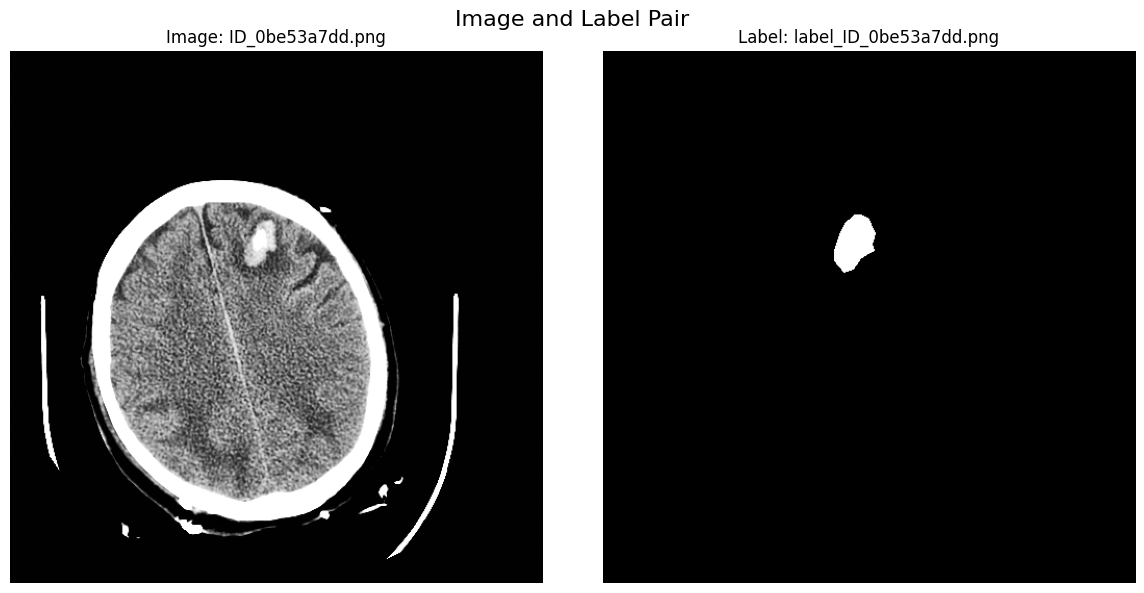

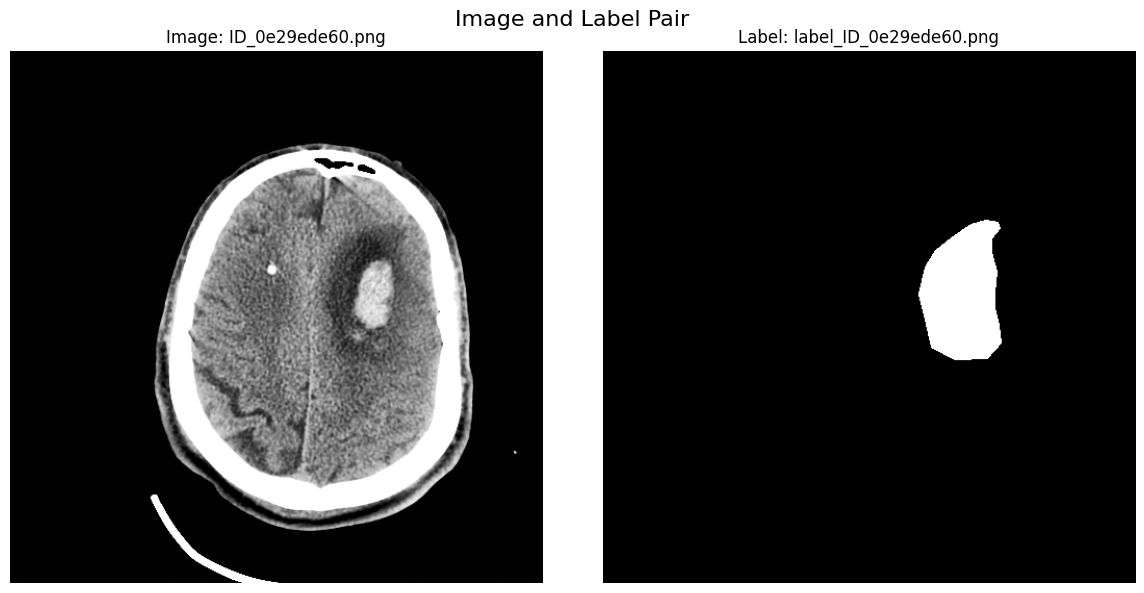

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Test image ve label klasör yolları
test_image_dir = "/content/Hastalik"
test_label_dir = "/content/MaskelenmisHastalik"

# Test dosyalarını al
test_images = sorted([os.path.join(test_image_dir, f) for f in os.listdir(test_image_dir) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tif'))])
test_labels = sorted([os.path.join(test_label_dir, f) for f in os.listdir(test_label_dir) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tif'))])

# Kontrol et
if not test_images or not test_labels:
    print("Test görüntüleri veya etiketler bulunamadı. Lütfen yolları kontrol edin.")
else:
    print(f"{len(test_images)} test görüntüsü yüklendi.")
    print(f"{len(test_labels)} test maskesi yüklendi.")

# Tüm görüntüleri ve maskeleri göster
for image_path, label_path in zip(test_images, test_labels):
    sample_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sample_label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

    if sample_image is None or sample_label is None:
        print(f"Error loading image or label: {os.path.basename(image_path)}")
        continue

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sample_label, cmap='gray')
    plt.title(f"Label: {os.path.basename(label_path)}")
    plt.axis('off')

    plt.suptitle("Image and Label Pair", fontsize=16)
    plt.tight_layout()
    plt.show()


####Kanamanın Hog Yöntemiyle Original Görüntüden Çıkarılması ve Özelliklerinin Kaydedilmesi####

Labeli referans alarak Hog yöntemiyle kanama noktasını original görsel üzerinde çıkarıyoruz. Çıkarılan vektörlerin ortalamasını alarak her bir görsel için ortalama tek bir vektör elde ediyoruz.

İşleniyor: ID_0bce0303d.png ve label_ID_0bce0303d.png
Single HOG vector saved for ID_0bce0303d.png: /content/extracted_hog_features/ID_0bce0303d_single_hog_vector.npy
Masked image saved for ID_0bce0303d.png: /content/extracted_hog_features/ID_0bce0303d_masked.png
HOG visualization saved for ID_0bce0303d.png: /content/extracted_hog_features/ID_0bce0303d_hog_visualization.png


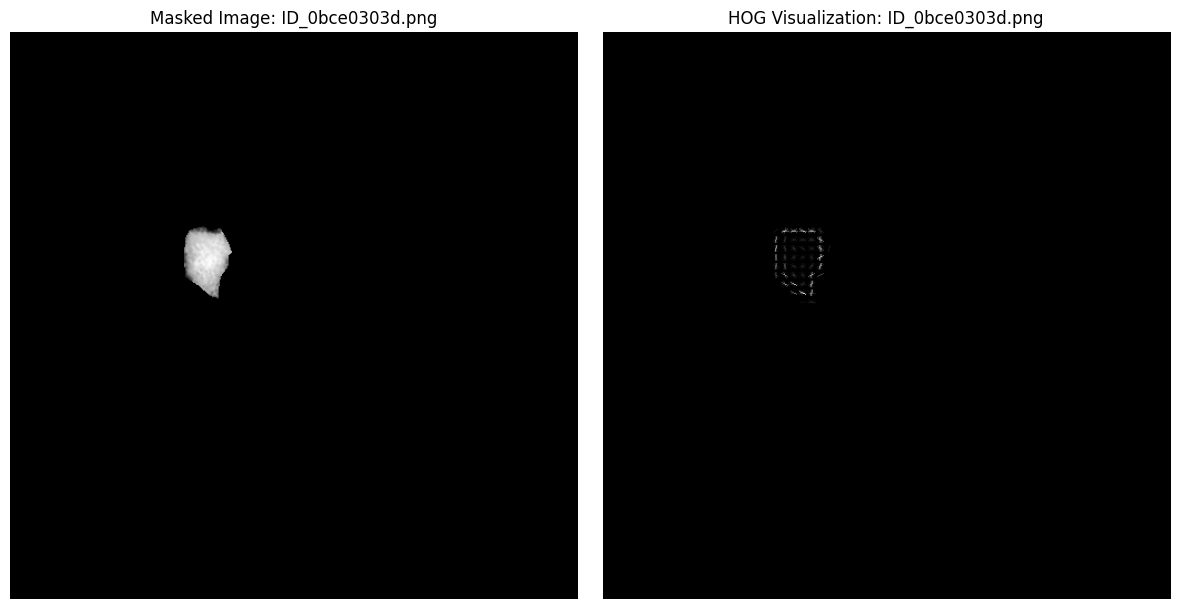

İşleniyor: ID_0be53a7dd.png ve label_ID_0be53a7dd.png
Single HOG vector saved for ID_0be53a7dd.png: /content/extracted_hog_features/ID_0be53a7dd_single_hog_vector.npy
Masked image saved for ID_0be53a7dd.png: /content/extracted_hog_features/ID_0be53a7dd_masked.png
HOG visualization saved for ID_0be53a7dd.png: /content/extracted_hog_features/ID_0be53a7dd_hog_visualization.png


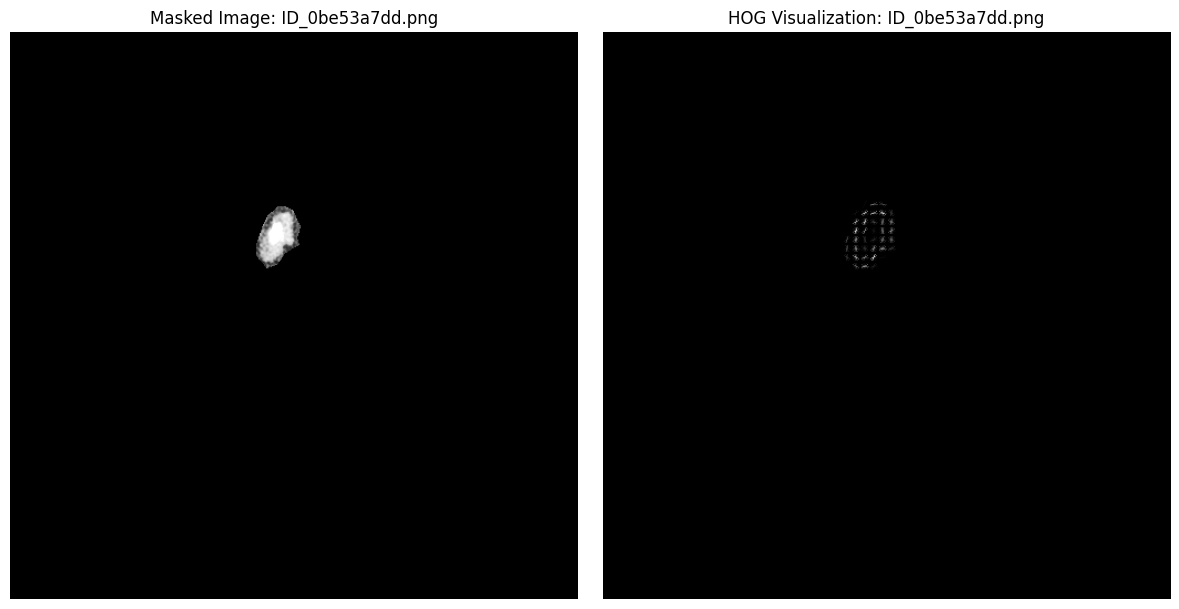

İşleniyor: ID_0e29ede60.png ve label_ID_0e29ede60.png
Single HOG vector saved for ID_0e29ede60.png: /content/extracted_hog_features/ID_0e29ede60_single_hog_vector.npy
Masked image saved for ID_0e29ede60.png: /content/extracted_hog_features/ID_0e29ede60_masked.png
HOG visualization saved for ID_0e29ede60.png: /content/extracted_hog_features/ID_0e29ede60_hog_visualization.png


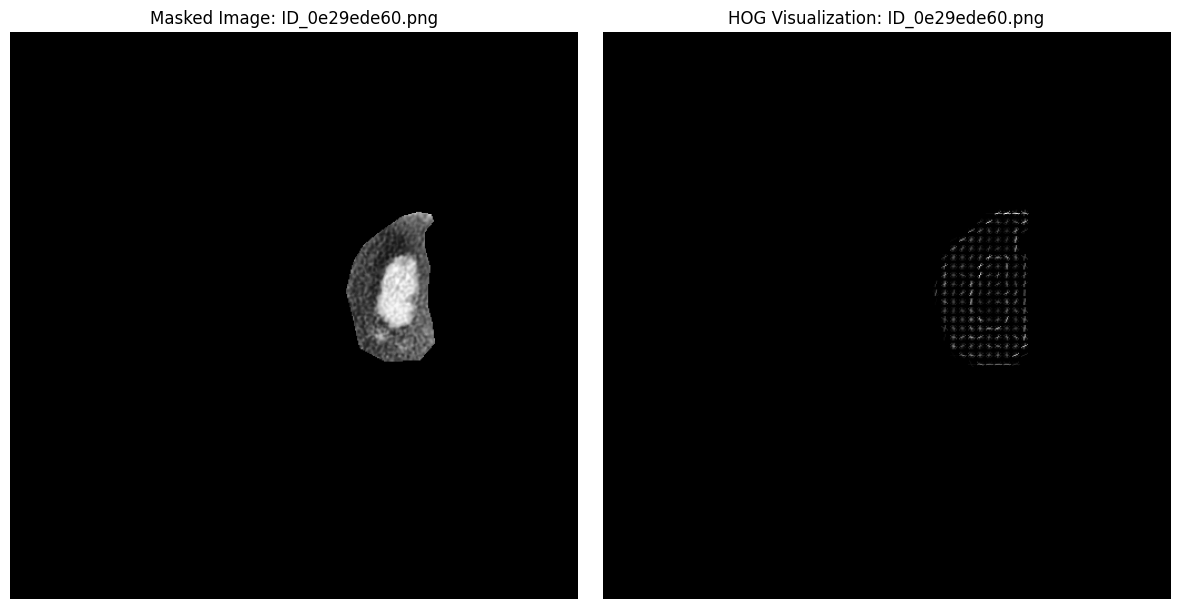

In [13]:
import os
import cv2
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt

# Girdi ve çıktı klasörlerini tanımlayın
image_folder = "/content/Hastalik"  # İşlenmiş görüntülerin bulunduğu klasör
mask_folder = "/content/MaskelenmisHastalik"  # Maskelerin bulunduğu klasör
output_folder = "/content/extracted_hog_features"  # Çıktıların kaydedileceği klasör
os.makedirs(output_folder, exist_ok=True)

# Function to calculate HOG features and create a single feature vector
def calculate_single_hog_vector(image, mask, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    # Mask the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Calculate HOG features
    hog_features, hog_image = hog(
        masked_image,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys',
        feature_vector=False,  # Not a flattened vector
        visualize=True
    )

    # Resize the mask to match the HOG feature map size
    hog_shape = hog_features.shape[:2]  # HOG feature map shape
    resized_mask = cv2.resize(mask, (hog_shape[1], hog_shape[0]), interpolation=cv2.INTER_NEAREST)
    resized_mask = (resized_mask > 0).astype(np.bool_)  # Ensure mask is boolean

    # Reduce to a single feature vector by averaging over the mask
    masked_hog_features = hog_features[resized_mask]
    single_hog_vector = masked_hog_features.mean(axis=0) if len(masked_hog_features) > 0 else np.zeros(hog_features.shape[-1])

    return single_hog_vector, hog_image, masked_image

# Klasördeki tüm görüntü ve maskeleri eşleştir ve işle
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])
mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

if len(image_files) != len(mask_files):
    raise ValueError("Görüntü ve maske sayıları eşleşmiyor. Lütfen dosyaları kontrol edin.")

for idx, (image_file, mask_file) in enumerate(zip(image_files, mask_files)):
    image_path = os.path.join(image_folder, image_file)
    mask_path = os.path.join(mask_folder, mask_file)

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or mask is None:
        print(f"Error reading image or mask for {image_file}. Skipping...")
        continue

    print(f"İşleniyor: {image_file} ve {mask_file}")

    # Calculate single HOG vector and visualization
    single_hog_vector, hog_image, masked_image = calculate_single_hog_vector(image, mask)

    # Save the single HOG vector
    feature_file = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_single_hog_vector.npy")
    np.save(feature_file, single_hog_vector)
    print(f"Single HOG vector saved for {image_file}: {feature_file}")

    # Save masked image
    masked_image_file = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_masked.png")
    cv2.imwrite(masked_image_file, masked_image)
    print(f"Masked image saved for {image_file}: {masked_image_file}")

    # Save HOG visualization
    hog_image_file = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_hog_visualization.png")
    cv2.imwrite(hog_image_file, (hog_image * 255).astype(np.uint8))
    print(f"HOG visualization saved for {image_file}: {hog_image_file}")

    # Visualize masked image and HOG
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(masked_image, cmap='gray')
    plt.title(f"Masked Image: {image_file}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title(f"HOG Visualization: {image_file}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

 Özelliklerin Kaydedilmesi: Her bir görsel için elde edilen vektörlerden tekrar ortalama bir vektör elde ediyoruz. Bu sayede kanamanın iyi göründüğü 3 farklı görselden elde edilen ortalama bir vektörümüz olmuş oluyor.





In [14]:
import os
import numpy as np

# Özellik vektörlerinin bulunduğu klasör
feature_folder = "/content/extracted_hog_features"

# Ortak vektör hesaplama
def calculate_common_vector(feature_folder):
    # Klasördeki tüm .npy dosyalarını bul
    feature_files = [f for f in os.listdir(feature_folder) if f.endswith('.npy')]

    if not feature_files:
        raise ValueError("Klasörde özellik vektör dosyası bulunamadı.")

    # Özellik vektörlerini yükle
    all_vectors = []
    for feature_file in feature_files:
        feature_path = os.path.join(feature_folder, feature_file)
        vector = np.load(feature_path)
        all_vectors.append(vector)

    # Tüm vektörlerden ortalama bir tek vektör oluştur
    all_vectors = np.array(all_vectors)
    common_vector = np.mean(all_vectors, axis=0)  # Ortalama hesaplama

    return common_vector

# Ortak vektörü hesapla
common_vector = calculate_common_vector(feature_folder)

# Ortak vektörü kaydet
output_file = os.path.join(feature_folder, "common_hog_vector.npy")
np.save(output_file, common_vector)
print(f"Ortak HOG vektörü kaydedildi: {output_file}")

# Ortak vektörü görselleştir (isteğe bağlı)
print(f"Ortak vektör boyutu: {common_vector.shape}")


Ortak HOG vektörü kaydedildi: /content/extracted_hog_features/common_hog_vector.npy
Ortak vektör boyutu: (2, 2, 9)


TEST

İşleniyor: ID_fb948a2a1.png
Tahmini etiket maskesi kaydedildi: /content/predicted_labels/ID_fb948a2a1_predicted_label.png


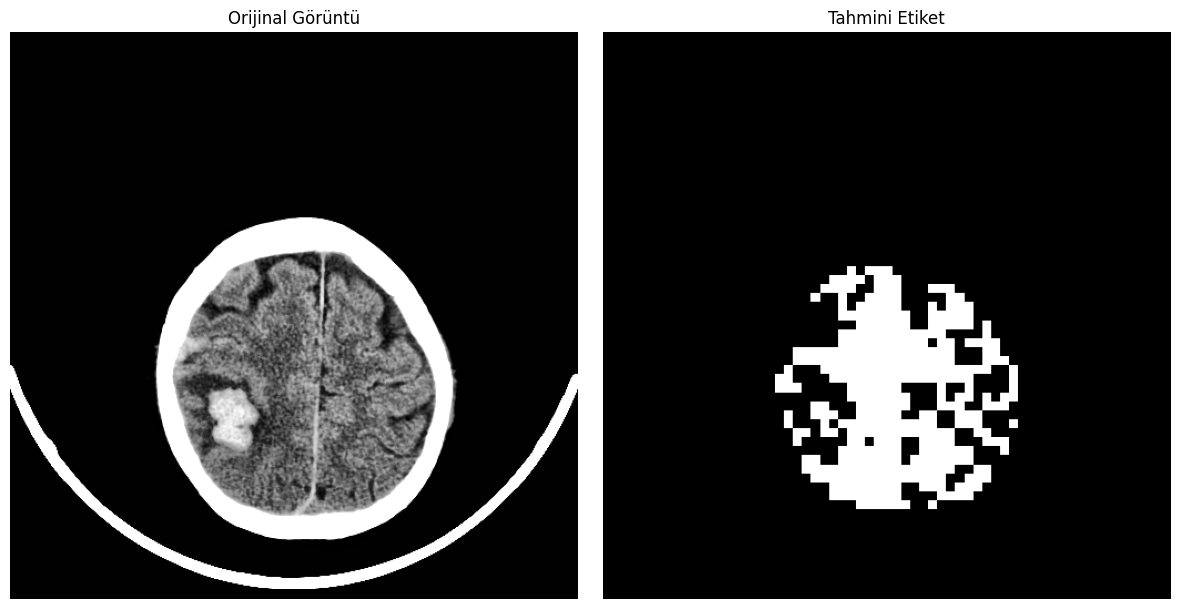

İşleniyor: ID_f4bdd75c1.png
Tahmini etiket maskesi kaydedildi: /content/predicted_labels/ID_f4bdd75c1_predicted_label.png


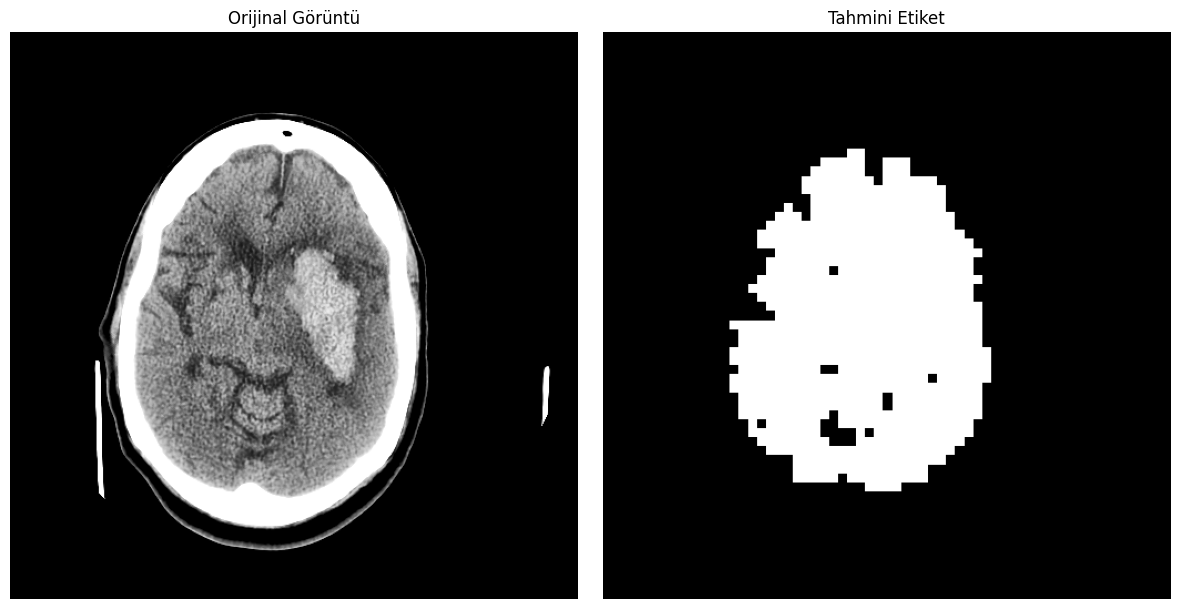

İşleniyor: ID_fd813b432.png
Tahmini etiket maskesi kaydedildi: /content/predicted_labels/ID_fd813b432_predicted_label.png


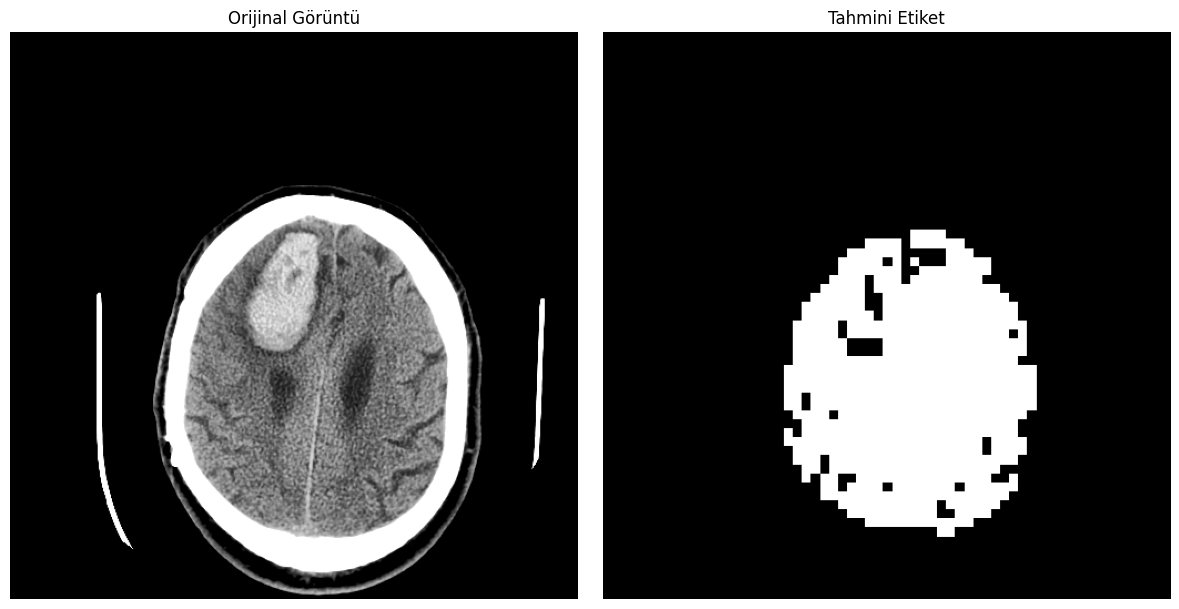

İşleniyor: ID_ef9a8b561.png
Tahmini etiket maskesi kaydedildi: /content/predicted_labels/ID_ef9a8b561_predicted_label.png


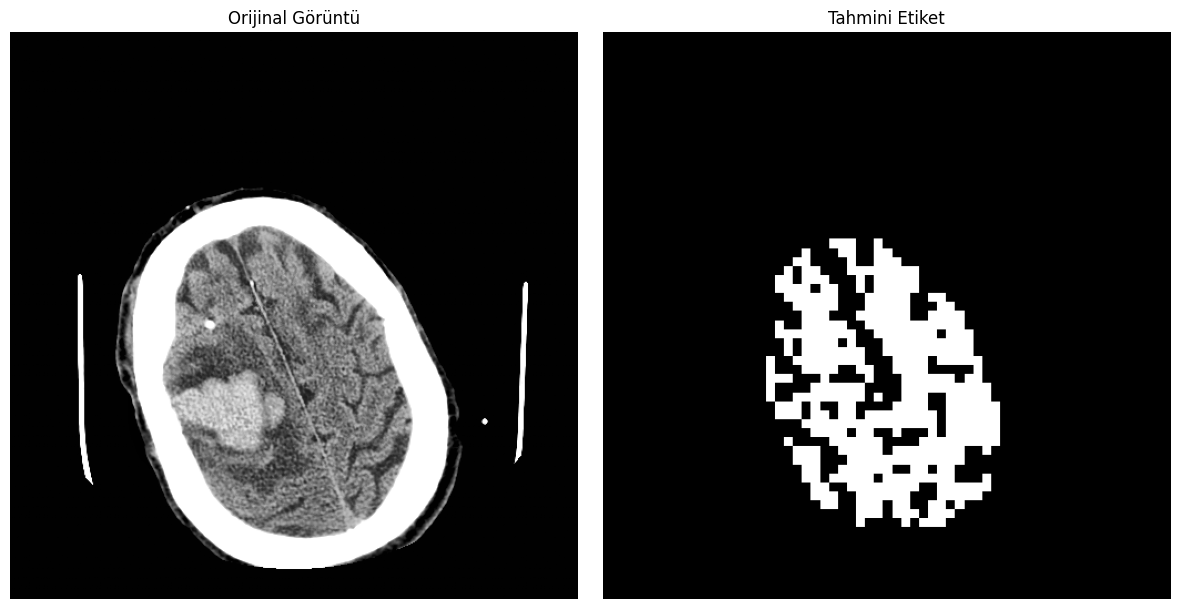

İşleniyor: ID_f911f7142.png
Tahmini etiket maskesi kaydedildi: /content/predicted_labels/ID_f911f7142_predicted_label.png


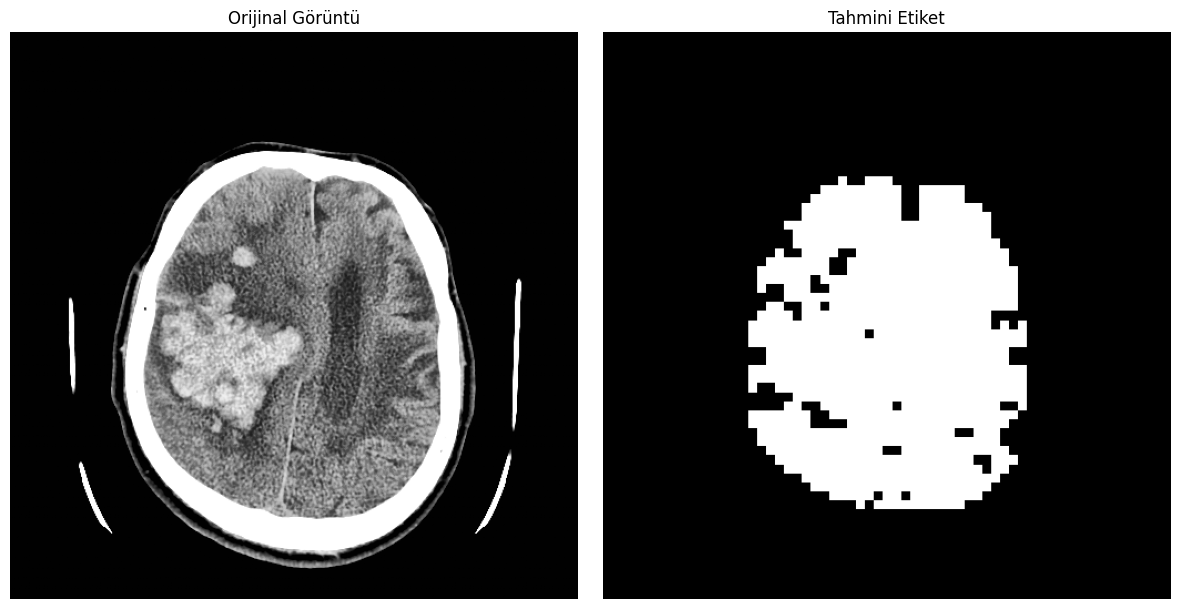

In [5]:
import os
import cv2
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt

def detect_bleed_area(input_folder, common_hog_vector_path, output_folder):
    # Çıktı klasörünü oluştur
    os.makedirs(output_folder, exist_ok=True)

    # Ortak HOG vektörünü yükle
    common_hog_vector = np.load(common_hog_vector_path)

    # Klasördeki tüm görüntüleri işle
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("Klasörde uygun formatta görüntü bulunamadı.")
        return

    for image_file in image_files:
        # Görüntüyü yükle
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error: '{image_path}' yüklenemedi.")
            continue

        print(f"İşleniyor: {image_file}")

        # HOG özelliklerini hesapla
        def calculate_hog_features(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
            hog_features, _ = hog(
                img,
                pixels_per_cell=pixels_per_cell,
                cells_per_block=cells_per_block,
                block_norm='L2-Hys',
                feature_vector=False,
                visualize=True
            )
            return hog_features

        hog_features = calculate_hog_features(image)

        # HOG özellik haritası boyutlarına göre mask oluştur
        mask = np.zeros(hog_features.shape[:2], dtype=np.uint8)

        # HOG özellikleri ile ortak vektör arasındaki mesafeyi hesapla
        for i in range(hog_features.shape[0]):
            for j in range(hog_features.shape[1]):
                distance = np.linalg.norm(hog_features[i, j] - common_hog_vector)
                if distance < 0.5:  # Eşik değeri (isteğe bağlı olarak ayarlanabilir)
                    mask[i, j] = 255

        # Maskeyi orijinal görüntü boyutuna ölçeklendir
        mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

        # Çıktıyı kaydet
        output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_predicted_label.png")
        cv2.imwrite(output_path, mask_resized)
        print(f"Tahmini etiket maskesi kaydedildi: {output_path}")

        # Sonucu görselleştir
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Orijinal Görüntü")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(mask_resized, cmap='gray')
        plt.title("Tahmini Etiket")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# Kullanım
input_folder = "/content/test"  # Test edilecek görüntülerin klasörü
common_hog_vector_path = "/content/extracted_hog_features/common_hog_vector.npy"  # Ortak HOG vektör dosyası
output_folder = "/content/predicted_labels"  # Tahmini etiketlerin kaydedileceği klasör
detect_bleed_area(input_folder, common_hog_vector_path, output_folder)


####Kanamanın CoHog Yöntemiyle Original Görüntüden Çıkarılması ve Özelliklerinin Kaydedilmesi####

Labeli referans alarak CoHog yöntemiyle kanama noktasını original görsel üzerinde çıkarıyoruz.

Kanama noktasındaki piksellerden şu istatistiksel özellikler hesaplanır ve kaydedilir:

Ortalama (Mean)
Standart Sapma (StdDev)
Varyans (Variance)
Maksimum Piksel Değeri (Max)
Minimum Piksel Değeri (Min)

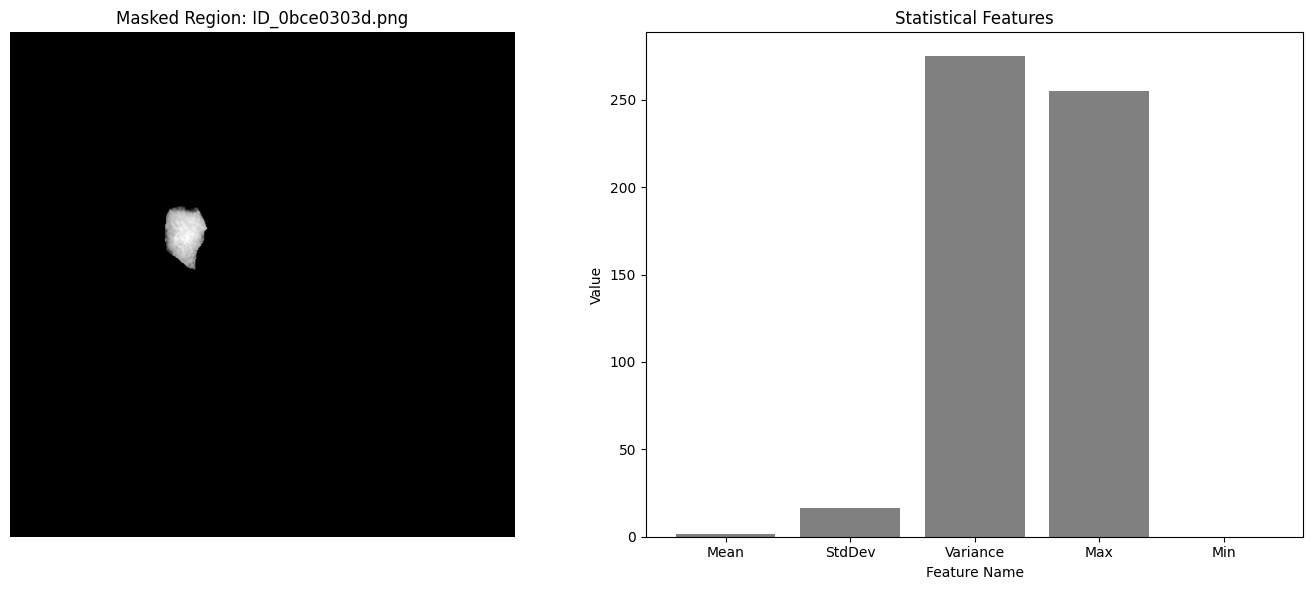

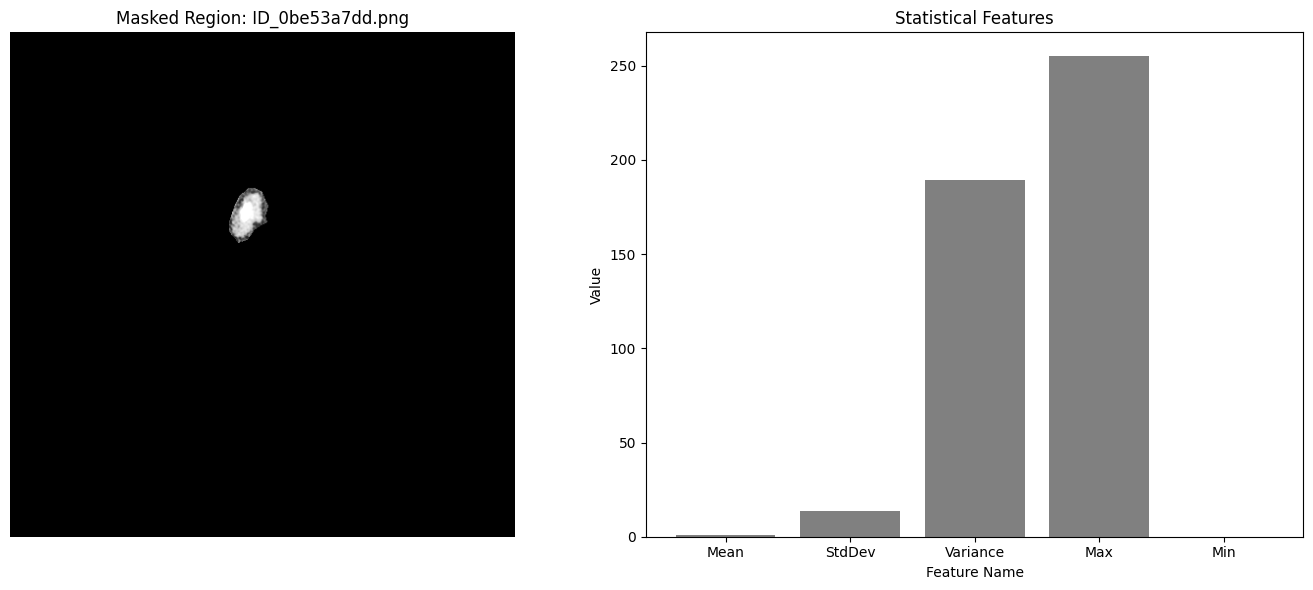

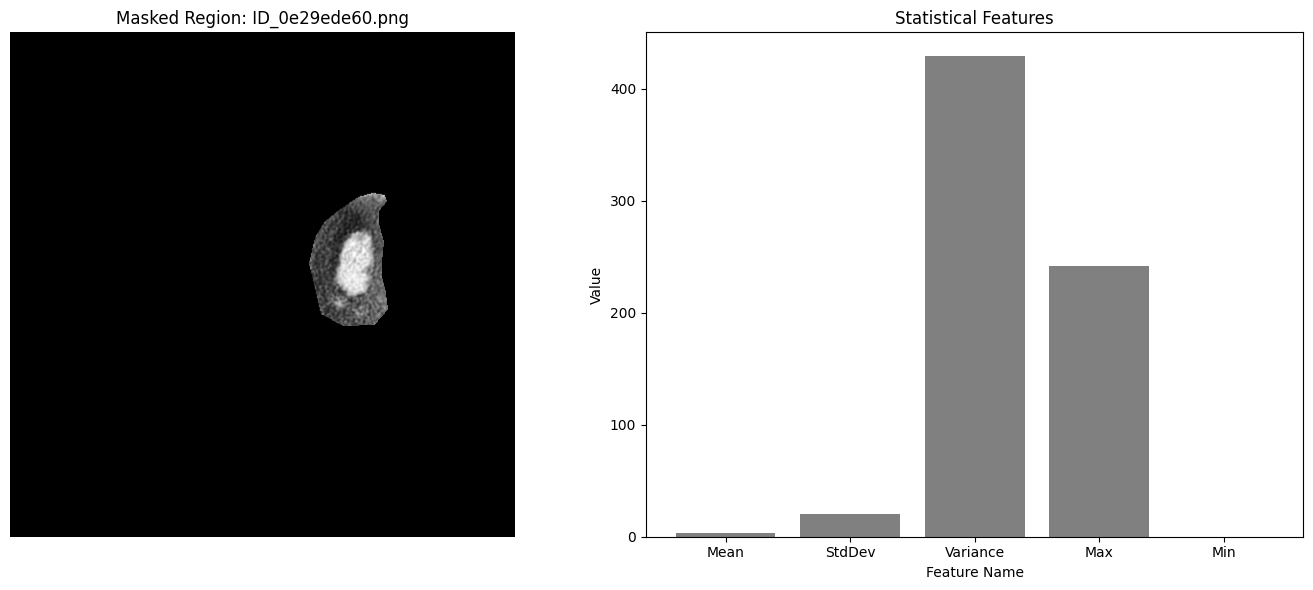

Common feature vector saved at: /content/output_features/common_feature_vector.npy


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Histogram ve istatistiksel özellikleri çıkarma
def calculate_features(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()  # Histogram
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    max_val = np.max(image)
    min_val = np.min(image)
    return {
        "Mean": mean,
        "StdDev": std,
        "Variance": var,
        "Max": max_val,
        "Min": min_val,
        "Histogram": hist
    }

# Görselleri işleme
def process_images_without_glcm(image_folder, mask_folder, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    all_feature_vectors = []

    for image_file, mask_file in zip(image_files, mask_files):
        image_path = os.path.join(image_folder, image_file)
        mask_path = os.path.join(mask_folder, mask_file)

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None or mask is None:
            print(f"Error reading image or mask for {image_file}. Skipping...")
            continue

        # Maskeleme işlemi
        region = cv2.bitwise_and(image, image, mask=mask)

        # Özellikleri hesaplama
        features = calculate_features(region)

        # Histogram hariç diğer özelliklerden vektör oluşturma
        feature_vector = np.array([features["Mean"], features["StdDev"], features["Variance"], features["Max"], features["Min"]])
        all_feature_vectors.append(feature_vector)

        # Görselleştirme
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(region, cmap='gray')
        plt.title(f"Masked Region: {image_file}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.bar(["Mean", "StdDev", "Variance", "Max", "Min"], feature_vector, color='gray')
        plt.title("Statistical Features")
        plt.xlabel("Feature Name")
        plt.ylabel("Value")
        plt.tight_layout()
        plt.show()

    # Tek tek özellik vektörlerini kaydetme
    for idx, vector in enumerate(all_feature_vectors):
        vector_path = os.path.join(output_dir, f"feature_vector_{idx+1}.npy")
        np.save(vector_path, vector)

    # Ortalama vektör hesaplama
    if all_feature_vectors:
        common_vector = np.mean(all_feature_vectors, axis=0)
        common_vector_path = os.path.join(output_dir, "common_feature_vector.npy")
        np.save(common_vector_path, common_vector)
        print(f"Common feature vector saved at: {common_vector_path}")

# Kullanım
image_folder = "/content/Hastalik"  # İşlenmiş görüntülerin bulunduğu klasör
mask_folder = "/content/MaskelenmisHastalik"  # Maskelerin bulunduğu klasör
output_dir = "/content/output_features"  # Özelliklerin kaydedileceği klasör
process_images_without_glcm(image_folder, mask_folder, output_dir)


TEST

Prediction mask saved: /content/predicted_labels_cohog/predicted_ID_ef9a8b561.png


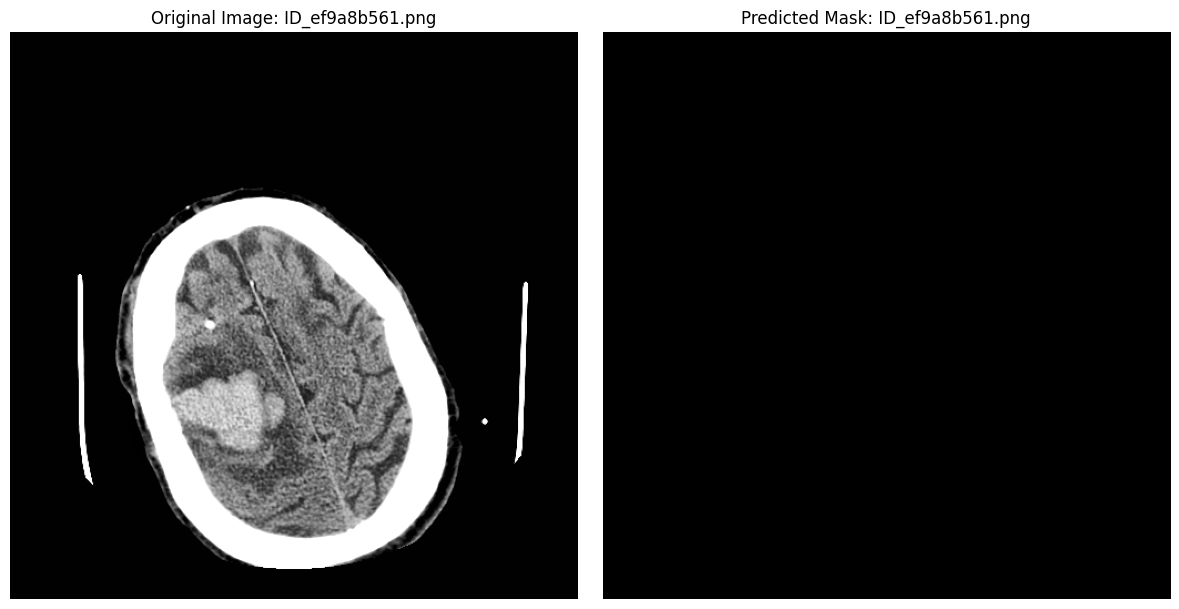

Prediction mask saved: /content/predicted_labels_cohog/predicted_ID_f4bdd75c1.png


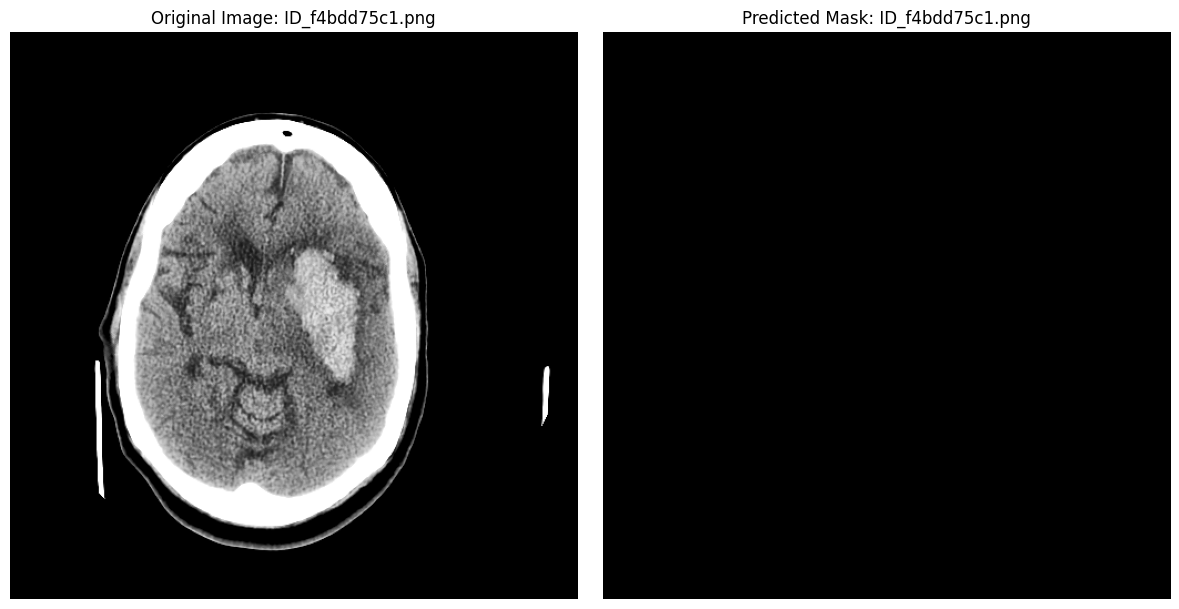

Prediction mask saved: /content/predicted_labels_cohog/predicted_ID_f911f7142.png


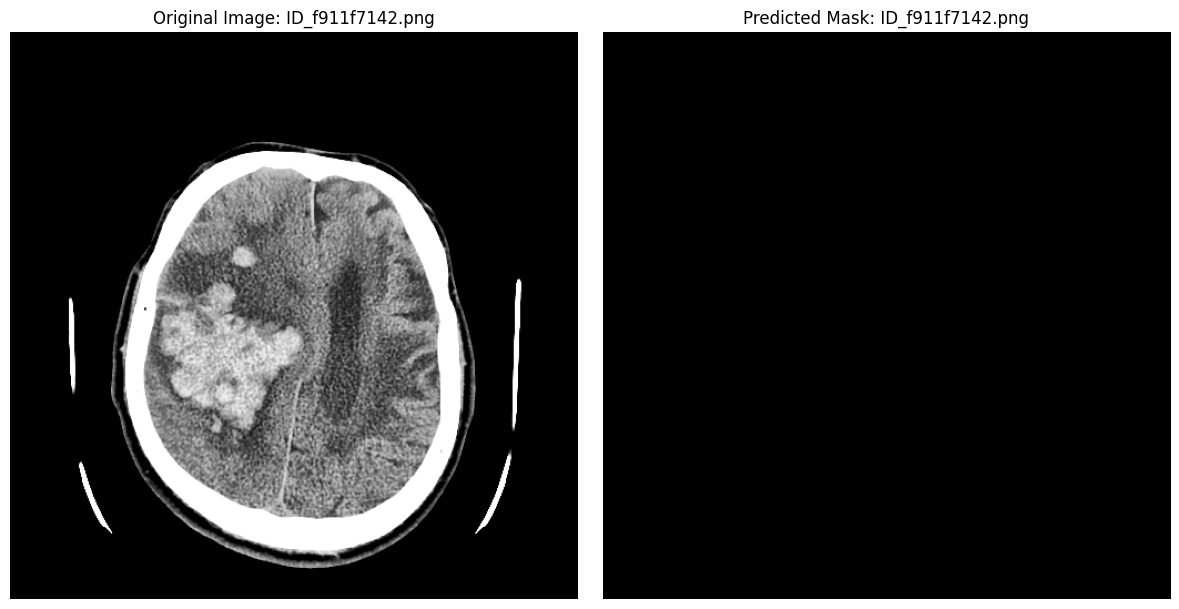

Prediction mask saved: /content/predicted_labels_cohog/predicted_ID_fb948a2a1.png


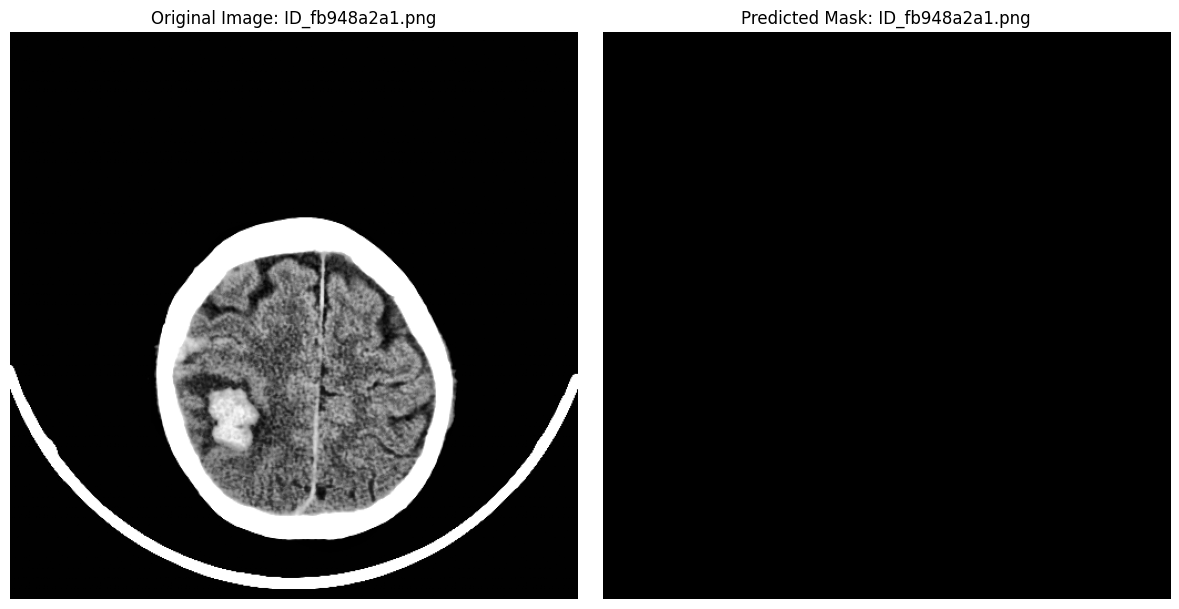

Prediction mask saved: /content/predicted_labels_cohog/predicted_ID_fd813b432.png


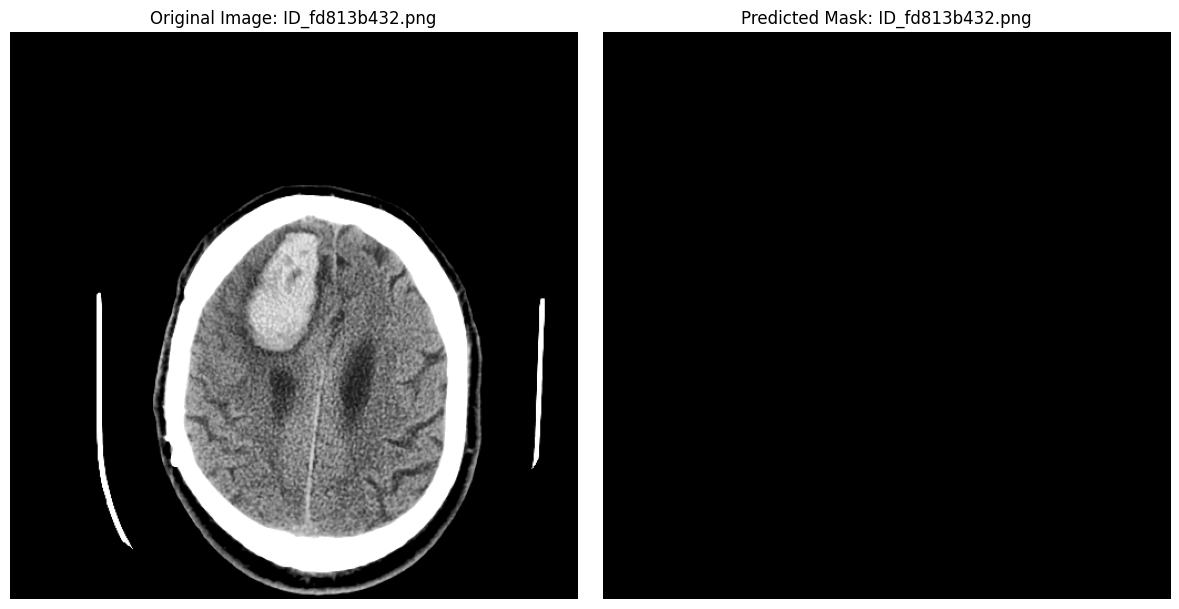

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ortak özellik vektörünü yükleme
def load_common_vector(common_vector_path):
    return np.load(common_vector_path)

# Görüntüden özellik çıkarma (aynı yöntem kullanılacak)
def calculate_features(image):
    mean = np.mean(image)
    std = np.std(image)
    var = np.var(image)
    max_val = np.max(image)
    min_val = np.min(image)
    return np.array([mean, std, var, max_val, min_val])

# Kanama noktalarını tahmin etme
def detect_bleed_area(image, common_vector):
    height, width = image.shape
    prediction_mask = np.zeros((height, width), dtype=np.uint8)

    # Görüntüyü küçük pencerelere (örneğin, 8x8) bölerek özellik çıkartıyoruz
    window_size = 8
    for y in range(0, height, window_size):
        for x in range(0, width, window_size):
            window = image[y:y + window_size, x:x + window_size]

            if window.size < window_size * window_size:
                continue  # Kenardaki küçük pencereleri atla

            # Pencerenin özelliklerini hesapla
            features = calculate_features(window)

            # Uzaklık hesapla (Öklid Uzaklığı)
            distance = np.linalg.norm(features - common_vector)

            # Eğer uzaklık belli bir eşik değerin altındaysa, bu alanı kanama olarak işaretle
            if distance < 30:  # Eşik değeri: 50 (isteğe göre ayarlanabilir)
                prediction_mask[y:y + window_size, x:x + window_size] = 255

    return prediction_mask

# Etiketlenmemiş görüntüleri işleme
def process_unlabeled_images(image_folder, common_vector_path, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    # Ortak özellik vektörünü yükle
    common_vector = load_common_vector(common_vector_path)

    # Görselleri al
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading image: {image_file}. Skipping...")
            continue

        # Kanama noktalarını tahmin et
        prediction_mask = detect_bleed_area(image, common_vector)

        # Tahmin edilen maskeyi kaydet
        prediction_path = os.path.join(output_dir, f"predicted_{image_file}")
        cv2.imwrite(prediction_path, prediction_mask)
        print(f"Prediction mask saved: {prediction_path}")

        # Görselleştirme
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Original Image: {image_file}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(prediction_mask, cmap='gray')
        plt.title(f"Predicted Mask: {image_file}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# Kullanım
image_folder = "/content/test"  # Etiketlenmemiş görüntülerin klasörü
common_vector_path = "/content/cohog_features/common_feature_vector.npy"  # Ortak vektörün yolu
output_dir = "/content/predicted_labels_cohog"  # Tahmin edilen maskelerin kaydedileceği klasör
process_unlabeled_images(image_folder, common_vector_path, output_dir)


####**LBP İmg Kullanılarak Hog Özelliklerinin Çıkartılması**####

Bu kod, verilen **maskeleme görüntülerine** Local Binary Pattern (LBP) özelliklerini çıkarır, bu özellikleri normalize eder ve hem **LBP histogramlarını** hem de **LBP görselleştirmelerini** kaydeder.

LBP image saved for ID_0bce0303d.png: /content/output_lbp_images/lbp_ID_0bce0303d.png


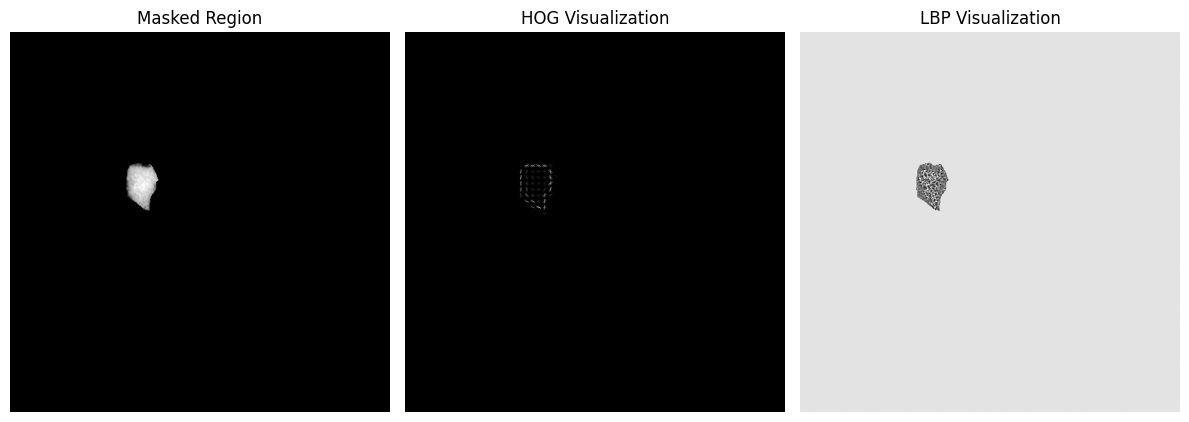

LBP image saved for ID_0be53a7dd.png: /content/output_lbp_images/lbp_ID_0be53a7dd.png


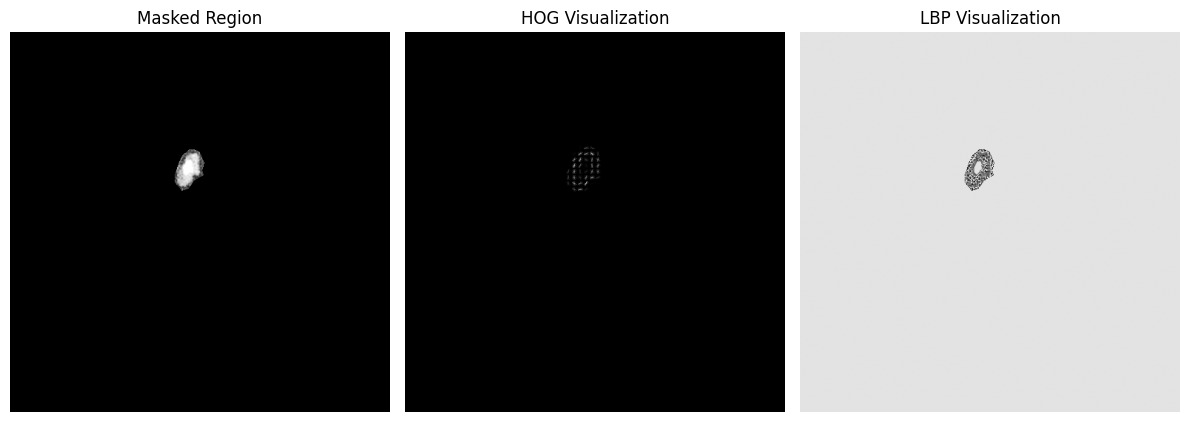

LBP image saved for ID_0e29ede60.png: /content/output_lbp_images/lbp_ID_0e29ede60.png


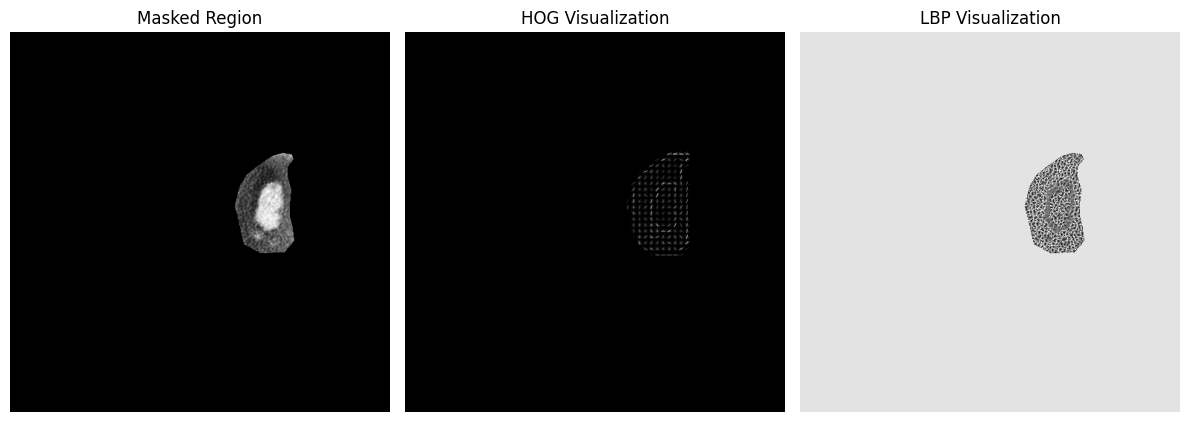

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.feature import hog

# HOG özelliklerini hesaplama
def calculate_hog_features(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    _, hog_image = hog(
        image,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys',
        visualize=True,
        feature_vector=True
    )
    return hog_image

# LBP özelliklerini hesaplama
def calculate_lbp_features(image, radius=1, n_points=8):
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")
    return lbp

# Görselleri işleme
def process_images(image_folder, mask_folder, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    for image_file, mask_file in zip(image_files, mask_files):
        image_path = os.path.join(image_folder, image_file)
        mask_path = os.path.join(mask_folder, mask_file)

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None or mask is None:
            print(f"Error reading image or mask for {image_file}. Skipping...")
            continue

        # Maskeleme işlemi
        masked_region = cv2.bitwise_and(image, image, mask=mask)

        # HOG görüntüsünü hesaplama
        hog_image = calculate_hog_features(masked_region)

        # LBP görüntüsünü hesaplama
        lbp_image = calculate_lbp_features(masked_region)

        # LBP görüntüsünü kaydetme
        lbp_image_path = os.path.join(output_dir, f"lbp_{image_file}")
        cv2.imwrite(lbp_image_path, (lbp_image * (255 / lbp_image.max())).astype(np.uint8))
        print(f"LBP image saved for {image_file}: {lbp_image_path}")

        # Görselleştirme
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 3, 1)
        plt.imshow(masked_region, cmap='gray')
        plt.title("Masked Region")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(hog_image, cmap='gray')
        plt.title("HOG Visualization")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(lbp_image, cmap='gray')
        plt.title("LBP Visualization")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

# Kullanım
image_folder = "/content/Hastalik"  # İşlenmiş görüntülerin bulunduğu klasör
mask_folder = "/content/MaskelenmisHastalik"  # Maskelerin bulunduğu klasör
output_dir = "/content/output_lbp_images"  # LBP görüntülerinin kaydedileceği klasör
process_images(image_folder, mask_folder, output_dir)


Bu kod, verilen **LBP görüntülerine** HOG özellikleri çıkarır, bunları kaydeder ve **HOG görselleştirmelerini** oluşturur. Her **LBP görüntüsünden** HOG özelliklerini hesaplar ve **özellik vektörlerini** kaydeder.

In [26]:
import os
import cv2
import numpy as np
from skimage.feature import hog

# HOG özelliklerini hesaplama fonksiyonu
def calculate_hog_features(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    features = hog(
        image,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys',
        visualize=False,
        feature_vector=True
    )
    return features

# LBP görsellerinden HOG özellik vektörlerini çıkarma ve ortalama oluşturma
def process_lbp_images_to_average_vector(image_folder, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    all_feature_vectors = []

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error reading image {image_file}. Skipping...")
            continue

        # HOG özelliklerini çıkar
        hog_features = calculate_hog_features(image)

        # Özellik vektörünü listeye ekle
        all_feature_vectors.append(hog_features)

    # Tüm özellik vektörlerinin ortalamasını alarak genel bir vektör oluştur
    average_feature_vector = np.mean(all_feature_vectors, axis=0)

    # Ortalama vektörü kaydet
    avg_vector_path = os.path.join(output_dir, "average_hog_vector.npy")
    np.save(avg_vector_path, average_feature_vector)
    print(f"Ortalama HOG vektörü başarıyla kaydedildi: {avg_vector_path}")

# Kullanım
lbp_image_folder = "/content/output_lbp_images"  # LBP görsellerinin olduğu klasör
output_dir = "/content/output_lbp_features"  # Özelliklerin kaydedileceği klasör
process_lbp_images_to_average_vector(lbp_image_folder, output_dir)


Ortalama HOG vektörü başarıyla kaydedildi: /content/output_lbp_features/average_hog_vector.npy


TEST

In [27]:
def predict_with_average_hog(test_folder, avg_vector_path, output_dir, threshold=0.5):
    os.makedirs(output_dir, exist_ok=True)

    # Ortalama vektörü yükle
    avg_feature_vector = np.load(avg_vector_path)

    test_files = sorted([f for f in os.listdir(test_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    for test_file in test_files:
        test_path = os.path.join(test_folder, test_file)
        test_image = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)

        if test_image is None:
            print(f"Error reading test image {test_file}. Skipping...")
            continue

        # HOG özelliklerini çıkar
        features = calculate_hog_features(test_image)

        # Özellikleri karşılaştırarak tahmin yap
        distance = np.linalg.norm(features - avg_feature_vector)
        if distance < threshold:
            print(f"Kanama tahmin edildi: {test_file}")
        else:
            print(f"Kanama tahmin edilmedi: {test_file}")


# Kullanım
test_folder = "/content/test"  # Test görsellerinin olduğu klasör
avg_vector_path = "/content/output_lbp_features/average_hog_vector.npy"  # Eğitimden elde edilen ortalama vektör
output_dir = "/content/predicted_labels_lbp"  # Tahmin sonuçlarının kaydedileceği klasör
predict_with_average_hog(test_folder, avg_vector_path, output_dir, threshold=10.0)




Kanama tahmin edilmedi: ID_ef9a8b561.png
Kanama tahmin edilmedi: ID_f4bdd75c1.png
Kanama tahmin edilmedi: ID_f911f7142.png
Kanama tahmin edilmedi: ID_fb948a2a1.png
Kanama tahmin edilmedi: ID_fd813b432.png


####Erosion ile Hog Hesaplama####

Bu kod, verilen **Labellere** erozyon işlemi uygulayarak her birini **işler**, erozyon işlemi çıktısı olan labellerin merkez konumu kullanılarak original kanama görselinden patch (yama) alınır. alınan bu patch'in özellikleri vektör olarak kaydedilir.

/content/Hastalik/ID_0bce0303d.png için vektör kaydedildi: /content/output_vectors/ID_0bce0303d_vector.npy


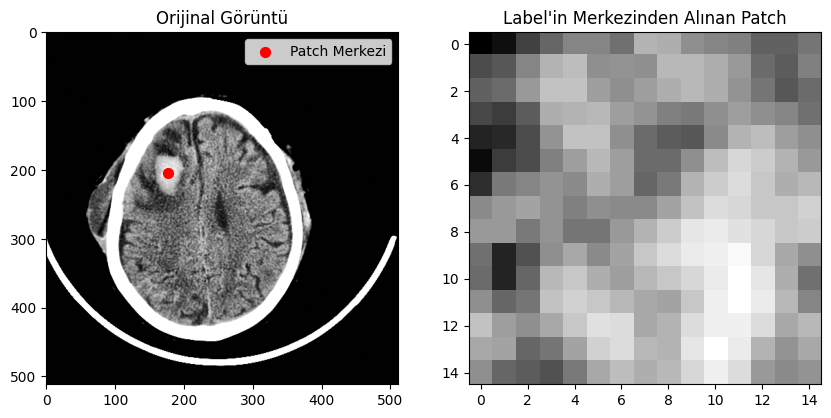

In [25]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def erode_label(label, kernel_size=3):
    """
    Label'i erosion ile küçült.
    """
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_label = cv2.erode(label, kernel, iterations=1)
    return eroded_label

def extract_center_patch(image, label, patch_size):
    """
    Label'in merkezine dayalı olarak orijinal görüntüden mxm boyutunda bir patch çıkarır.
    """
    half_patch = patch_size // 2

    # Label'in beyaz (pozitif) piksellerinin koordinatlarını bul
    coords = np.column_stack(np.where(label > 0))

    if len(coords) == 0:
        raise ValueError("Label üzerinde pozitif piksel bulunamadı.")

    # Label'in ortasını belirle (ortalama koordinat)
    center_y, center_x = np.mean(coords, axis=0).astype(int)

    # Görüntü sınırlarını aşmamak için kontrol
    if (center_y - half_patch >= 0 and center_y + half_patch < image.shape[0] and
        center_x - half_patch >= 0 and center_x + half_patch < image.shape[1]):
        patch = image[center_y - half_patch:center_y + half_patch + 1,
                      center_x - half_patch:center_x + half_patch + 1]
        return patch, (center_y, center_x)
    else:
        raise ValueError("Patch sınırları görüntü dışına çıkıyor.")

def encode_patch(patch):
    """
    Patch'ten özellik çıkararak tek bir vektör döndür (örn: histogram).
    """
    # Histogram çıkarma
    hist = cv2.calcHist([patch], [0], None, [16], [0, 256])
    hist = hist.flatten()  # Tek bir vektör haline getir
    return hist / np.sum(hist)  # Normalizasyon

def process_image(image_path, label_path, output_path, patch_size=15, kernel_size=3):
    """
    Görüntü ve label üzerinde işlemi uygula ve sonuçları kaydet.
    """
    # Görüntü ve label yükle
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

    if image is None or label is None:
        print("Görüntü veya label yüklenemedi.")
        return

    # Label'i erosion ile küçült
    eroded_label = erode_label(label, kernel_size=kernel_size)

    try:
        # Label'in merkezinden patch çıkar
        center_patch, center_coords = extract_center_patch(image, eroded_label, patch_size)

        # Patch'i kodla
        encoded_vector = encode_patch(center_patch)

        # Vektörü npy dosyasına kaydet
        base_name = os.path.splitext(os.path.basename(image_path))[0]
        output_file = os.path.join(output_path, f"{base_name}_vector.npy")
        np.save(output_file, encoded_vector)
        print(f"{image_path} için vektör kaydedildi: {output_file}")

        # Görselleştirme
        visualize_patch(image, center_patch, center_coords, "Label'in Merkezinden Alınan Patch")

    except ValueError as e:
        print(f"{image_path} işlenirken hata: {e}")

def visualize_patch(original_image, patch, patch_coords, title):
    """
    Görselleştirme: Orijinal görüntü ve patch.
    """
    plt.figure(figsize=(10, 5))

    # Orijinal görüntü
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Orijinal Görüntü")
    plt.scatter(patch_coords[1], patch_coords[0], color='red', s=50, label='Patch Merkezi')
    plt.legend()

    # Seçilen patch
    plt.subplot(1, 2, 2)
    plt.imshow(patch, cmap='gray')
    plt.title(title)

    plt.show()

# Ana fonksiyon
if __name__ == "__main__":
    image_path = "/content/Hastalik/ID_0bce0303d.png"  # Görüntü dosyası
    label_path = "/content/MaskelenmisHastalik/label_ID_0bce0303d.png"  # Label dosyası
    output_path = "/content/output_vectors"  # Çıktı klasörü
    patch_size = 15  # mxm boyutu
    kernel_size = 5  # Erosion kernel boyutu

    # Çıktı klasörünü oluştur
    os.makedirs(output_path, exist_ok=True)

    # İşleme başla
    process_image(image_path, label_path, output_path, patch_size, kernel_size)


/content/Hastalik/ID_0be53a7dd.png için vektör kaydedildi: /content/output_vectors/ID_0be53a7dd_vector.npy


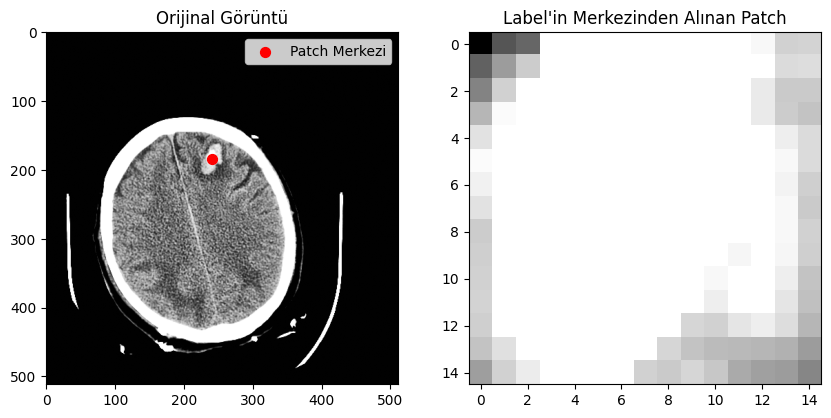

In [26]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def erode_label(label, kernel_size=3):
    """
    Label'i erosion ile küçült.
    """
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_label = cv2.erode(label, kernel, iterations=1)
    return eroded_label

def extract_center_patch(image, label, patch_size):
    """
    Label'in merkezine dayalı olarak orijinal görüntüden mxm boyutunda bir patch çıkarır.
    """
    half_patch = patch_size // 2

    # Label'in beyaz (pozitif) piksellerinin koordinatlarını bul
    coords = np.column_stack(np.where(label > 0))

    if len(coords) == 0:
        raise ValueError("Label üzerinde pozitif piksel bulunamadı.")

    # Label'in ortasını belirle (ortalama koordinat)
    center_y, center_x = np.mean(coords, axis=0).astype(int)

    # Görüntü sınırlarını aşmamak için kontrol
    if (center_y - half_patch >= 0 and center_y + half_patch < image.shape[0] and
        center_x - half_patch >= 0 and center_x + half_patch < image.shape[1]):
        patch = image[center_y - half_patch:center_y + half_patch + 1,
                      center_x - half_patch:center_x + half_patch + 1]
        return patch, (center_y, center_x)
    else:
        raise ValueError("Patch sınırları görüntü dışına çıkıyor.")

def encode_patch(patch):
    """
    Patch'ten özellik çıkararak tek bir vektör döndür (örn: histogram).
    """
    # Histogram çıkarma
    hist = cv2.calcHist([patch], [0], None, [16], [0, 256])
    hist = hist.flatten()  # Tek bir vektör haline getir
    return hist / np.sum(hist)  # Normalizasyon

def process_image(image_path, label_path, output_path, patch_size=15, kernel_size=3):
    """
    Görüntü ve label üzerinde işlemi uygula ve sonuçları kaydet.
    """
    # Görüntü ve label yükle
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

    if image is None or label is None:
        print("Görüntü veya label yüklenemedi.")
        return

    # Label'i erosion ile küçült
    eroded_label = erode_label(label, kernel_size=kernel_size)

    try:
        # Label'in merkezinden patch çıkar
        center_patch, center_coords = extract_center_patch(image, eroded_label, patch_size)

        # Patch'i kodla
        encoded_vector = encode_patch(center_patch)

        # Vektörü npy dosyasına kaydet
        base_name = os.path.splitext(os.path.basename(image_path))[0]
        output_file = os.path.join(output_path, f"{base_name}_vector.npy")
        np.save(output_file, encoded_vector)
        print(f"{image_path} için vektör kaydedildi: {output_file}")

        # Görselleştirme
        visualize_patch(image, center_patch, center_coords, "Label'in Merkezinden Alınan Patch")

    except ValueError as e:
        print(f"{image_path} işlenirken hata: {e}")

def visualize_patch(original_image, patch, patch_coords, title):
    """
    Görselleştirme: Orijinal görüntü ve patch.
    """
    plt.figure(figsize=(10, 5))

    # Orijinal görüntü
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Orijinal Görüntü")
    plt.scatter(patch_coords[1], patch_coords[0], color='red', s=50, label='Patch Merkezi')
    plt.legend()

    # Seçilen patch
    plt.subplot(1, 2, 2)
    plt.imshow(patch, cmap='gray')
    plt.title(title)

    plt.show()

# Ana fonksiyon
if __name__ == "__main__":
    image_path = "/content/Hastalik/ID_0be53a7dd.png"  # Görüntü dosyası
    label_path = "/content/MaskelenmisHastalik/label_ID_0be53a7dd.png"  # Label dosyası
    output_path = "/content/output_vectors"  # Çıktı klasörü
    patch_size = 15  # mxm boyutu
    kernel_size = 5  # Erosion kernel boyutu

    # Çıktı klasörünü oluştur
    os.makedirs(output_path, exist_ok=True)

    # İşleme başla
    process_image(image_path, label_path, output_path, patch_size, kernel_size)


/content/Hastalik/ID_0e29ede60.png için vektör kaydedildi: /content/output_vectors/ID_0e29ede60_vector.npy


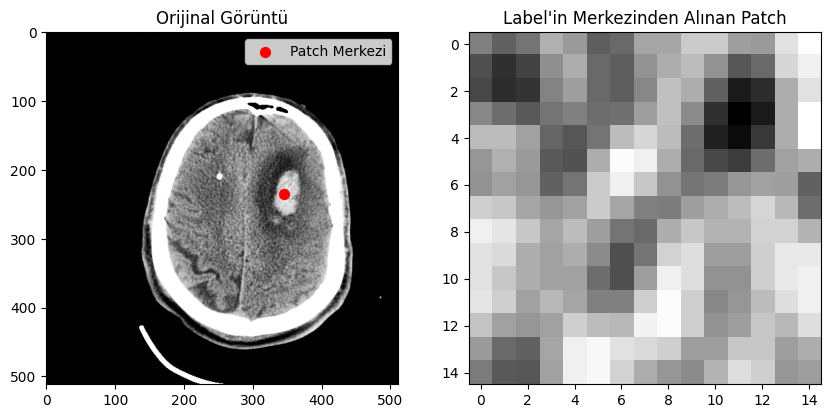

In [27]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def erode_label(label, kernel_size=3):
    """
    Label'i erosion ile küçült.
    """
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_label = cv2.erode(label, kernel, iterations=1)
    return eroded_label

def extract_center_patch(image, label, patch_size):
    """
    Label'in merkezine dayalı olarak orijinal görüntüden mxm boyutunda bir patch çıkarır.
    """
    half_patch = patch_size // 2

    # Label'in beyaz (pozitif) piksellerinin koordinatlarını bul
    coords = np.column_stack(np.where(label > 0))

    if len(coords) == 0:
        raise ValueError("Label üzerinde pozitif piksel bulunamadı.")

    # Label'in ortasını belirle (ortalama koordinat)
    center_y, center_x = np.mean(coords, axis=0).astype(int)

    # Görüntü sınırlarını aşmamak için kontrol
    if (center_y - half_patch >= 0 and center_y + half_patch < image.shape[0] and
        center_x - half_patch >= 0 and center_x + half_patch < image.shape[1]):
        patch = image[center_y - half_patch:center_y + half_patch + 1,
                      center_x - half_patch:center_x + half_patch + 1]
        return patch, (center_y, center_x)
    else:
        raise ValueError("Patch sınırları görüntü dışına çıkıyor.")

def encode_patch(patch):
    """
    Patch'ten özellik çıkararak tek bir vektör döndür (örn: histogram).
    """
    # Histogram çıkarma
    hist = cv2.calcHist([patch], [0], None, [16], [0, 256])
    hist = hist.flatten()  # Tek bir vektör haline getir
    return hist / np.sum(hist)  # Normalizasyon

def process_image(image_path, label_path, output_path, patch_size=15, kernel_size=3):
    """
    Görüntü ve label üzerinde işlemi uygula ve sonuçları kaydet.
    """
    # Görüntü ve label yükle
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

    if image is None or label is None:
        print("Görüntü veya label yüklenemedi.")
        return

    # Label'i erosion ile küçült
    eroded_label = erode_label(label, kernel_size=kernel_size)

    try:
        # Label'in merkezinden patch çıkar
        center_patch, center_coords = extract_center_patch(image, eroded_label, patch_size)

        # Patch'i kodla
        encoded_vector = encode_patch(center_patch)

        # Vektörü npy dosyasına kaydet
        base_name = os.path.splitext(os.path.basename(image_path))[0]
        output_file = os.path.join(output_path, f"{base_name}_vector.npy")
        np.save(output_file, encoded_vector)
        print(f"{image_path} için vektör kaydedildi: {output_file}")

        # Görselleştirme
        visualize_patch(image, center_patch, center_coords, "Label'in Merkezinden Alınan Patch")

    except ValueError as e:
        print(f"{image_path} işlenirken hata: {e}")

def visualize_patch(original_image, patch, patch_coords, title):
    """
    Görselleştirme: Orijinal görüntü ve patch.
    """
    plt.figure(figsize=(10, 5))

    # Orijinal görüntü
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Orijinal Görüntü")
    plt.scatter(patch_coords[1], patch_coords[0], color='red', s=50, label='Patch Merkezi')
    plt.legend()

    # Seçilen patch
    plt.subplot(1, 2, 2)
    plt.imshow(patch, cmap='gray')
    plt.title(title)

    plt.show()

# Ana fonksiyon
if __name__ == "__main__":
    image_path = "/content/Hastalik/ID_0e29ede60.png"  # Görüntü dosyası
    label_path = "/content/MaskelenmisHastalik/label_ID_0e29ede60.png"  # Label dosyası
    output_path = "/content/output_vectors"  # Çıktı klasörü
    patch_size = 15  # mxm boyutu
    kernel_size = 5  # Erosion kernel boyutu

    # Çıktı klasörünü oluştur
    os.makedirs(output_path, exist_ok=True)

    # İşleme başla
    process_image(image_path, label_path, output_path, patch_size, kernel_size)


Görsel için oluşturulan vektörlerden ortalama tek bir vektör elde edilir. Bu sayede kanamanın iyi göründüğü 3 farklı görüntüden veri elde etmiş oluyoruz.

In [28]:
import os
import numpy as np

def calculate_average_vector(vector_folder, output_path):
    """
    Klasördeki tüm vektörlerin ortalamasını alarak tek bir vektör oluşturur ve kaydeder.
    """
    # Klasördeki tüm .npy dosyalarını bul
    vector_files = [f for f in os.listdir(vector_folder) if f.endswith('.npy')]

    if not vector_files:
        raise ValueError("Klasörde vektör dosyası bulunamadı.")

    # Vektörleri yükle
    all_vectors = []
    for vector_file in vector_files:
        vector_path = os.path.join(vector_folder, vector_file)
        vector = np.load(vector_path)

        if len(all_vectors) > 0 and vector.shape != all_vectors[0].shape:
            raise ValueError(f"Vektör boyutları uyumsuz: {vector_file} {vector.shape}")

        all_vectors.append(vector)

    # Tüm vektörlerin ortalamasını al
    all_vectors = np.array(all_vectors)
    average_vector = np.mean(all_vectors, axis=0)

    # Ortalamayı kaydet
    os.makedirs(output_path, exist_ok=True)
    output_file = os.path.join(output_path, "average_vector.npy")
    np.save(output_file, average_vector)
    print(f"Ortalama vektör kaydedildi: {output_file}")

    return average_vector

# Ana fonksiyon
if __name__ == "__main__":
    vector_folder = "/content/output_vectors"  # Vektörlerin bulunduğu klasör
    output_path = "/content/output_vectors/common_vector"    # Ortalamanın kaydedileceği klasör

    average_vector = calculate_average_vector(vector_folder, output_path)
    print("Ortalama vektör:", average_vector)


Ortalama vektör kaydedildi: /content/output_vectors/common_vector/average_vector.npy
Ortalama vektör: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00148148 0.00740741 0.03703703
 0.09925926 0.1911111  0.27555555 0.38814816]


TEST

Kanama tahmini yapılıyor: ID_f4bdd75c1.png


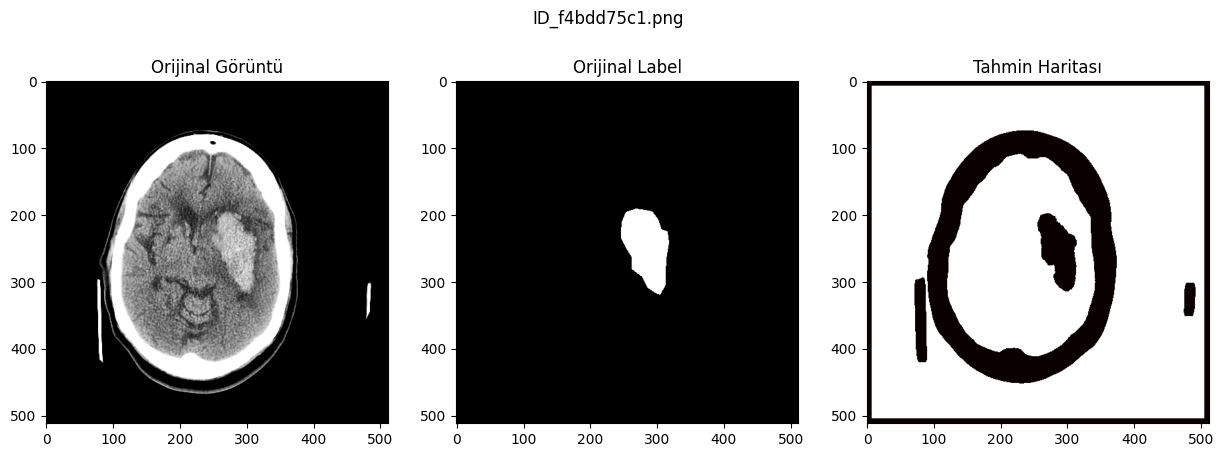

Kanama tahmini yapılıyor: ID_fb948a2a1.png


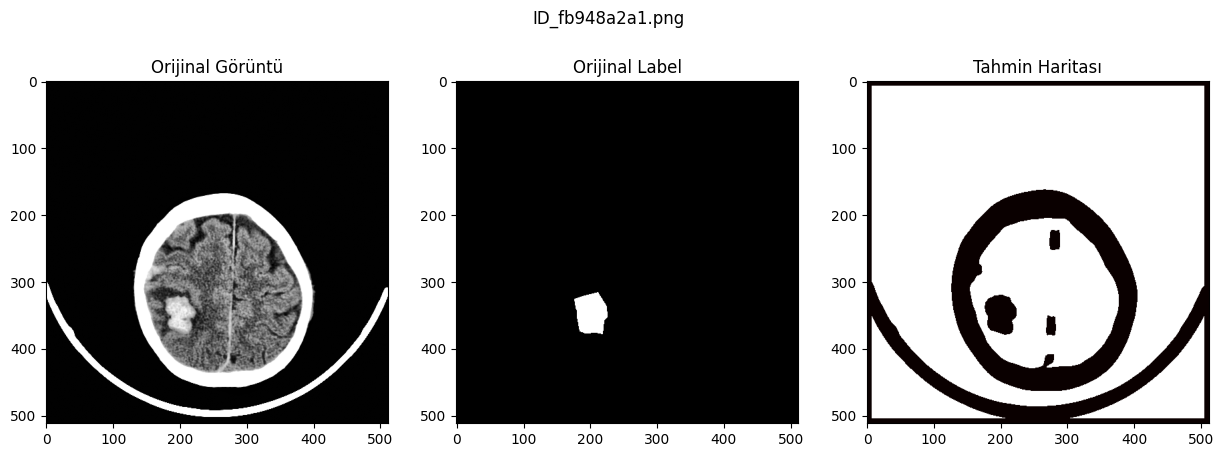

Kanama tahmini yapılıyor: ID_f911f7142.png


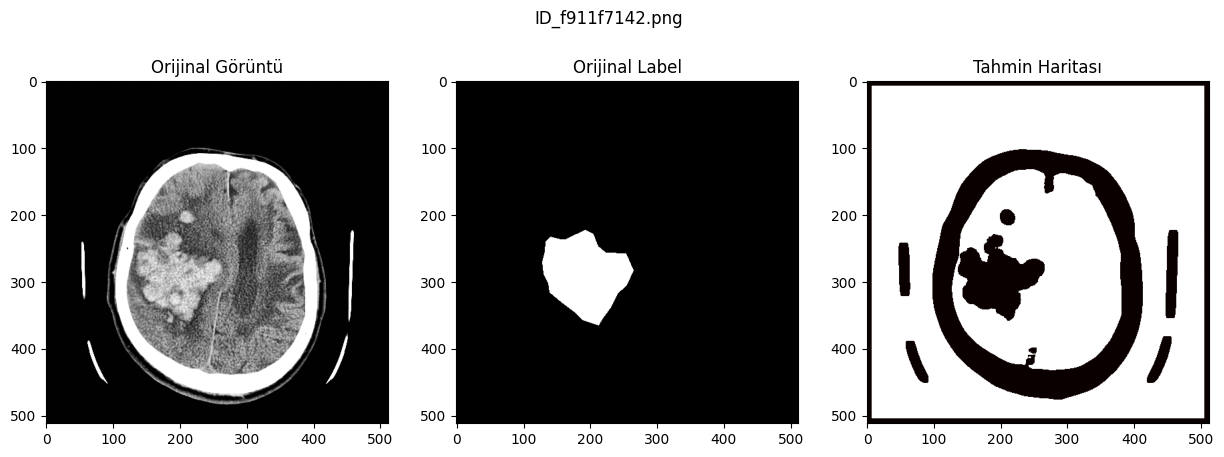

Kanama tahmini yapılıyor: ID_ef9a8b561.png


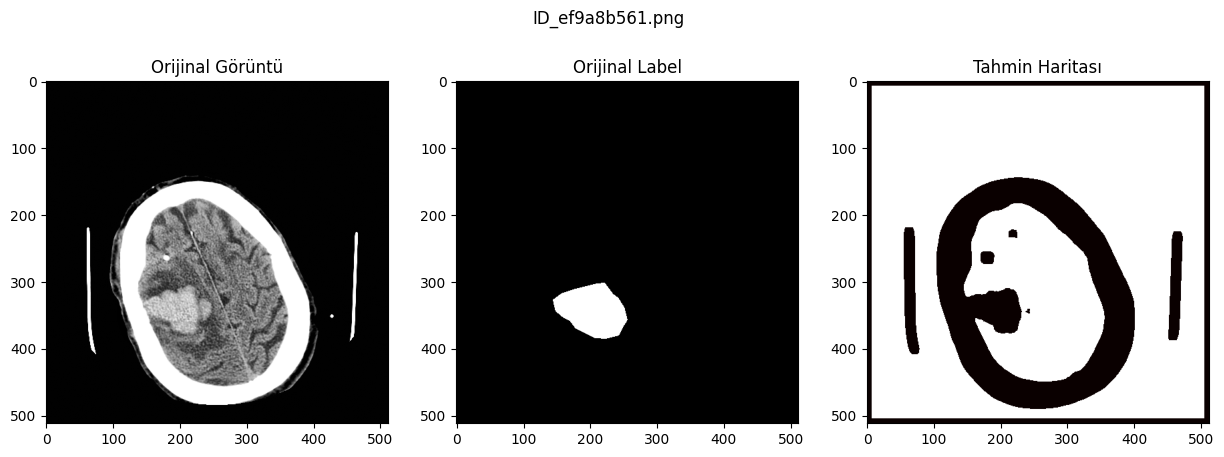

Kanama tahmini yapılıyor: ID_fd813b432.png


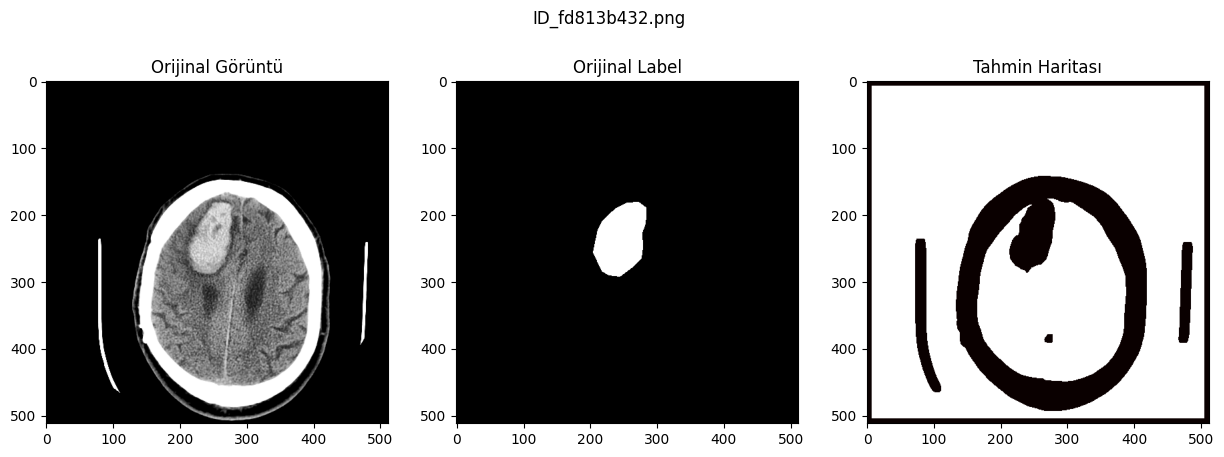

In [31]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def extract_patch(image, center, patch_size):
    """
    Görüntüden mxm boyutunda bir patch çıkar.
    """
    half_patch = patch_size // 2
    y, x = center

    if y - half_patch >= 0 and y + half_patch < image.shape[0] and x - half_patch >= 0 and x + half_patch < image.shape[1]:
        patch = image[y - half_patch:y + half_patch + 1, x - half_patch:x + half_patch + 1]
        return patch
    else:
        return None

def encode_patch(patch):
    """
    Patch'ten özellik çıkararak tek bir vektör döndür (örn: histogram).
    """
    hist = cv2.calcHist([patch], [0], None, [16], [0, 256])
    hist = hist.flatten()  # Tek bir vektör haline getir
    return hist / np.sum(hist)  # Normalizasyon

def predict_hemorrhage(image, average_vector, patch_size=15, threshold=0.1):
    """
    Kanama tahmini: Görüntü üzerinde kaydırmalı pencere ile kanama tahmini yapar.
    """
    half_patch = patch_size // 2
    hemorrhage_map = np.zeros_like(image, dtype=np.uint8)  # Tahmin sonuçlarını saklamak için harita

    for y in range(half_patch, image.shape[0] - half_patch):
        for x in range(half_patch, image.shape[1] - half_patch):
            patch = extract_patch(image, (y, x), patch_size)
            if patch is not None:
                encoded_vector = encode_patch(patch)
                similarity = np.dot(encoded_vector, average_vector) / (np.linalg.norm(encoded_vector) * np.linalg.norm(average_vector))
                if similarity < threshold:  # Benzer değilse kanama
                    hemorrhage_map[y, x] = 255

    return hemorrhage_map

def process_test_images(test_folder, label_folder, average_vector, output_folder, patch_size=15, threshold=0.1):
    """
    Klasördeki test görüntülerinde kanama tahmini yapar ve sonuçları kaydeder.
    """
    test_files = [f for f in os.listdir(test_folder) if f.endswith('.png')]

    if not test_files:
        raise ValueError("Test klasöründe herhangi bir görüntü bulunamadı.")

    os.makedirs(output_folder, exist_ok=True)  # Çıktı klasörünü oluştur

    for test_file in test_files:
        test_path = os.path.join(test_folder, test_file)
        label_file = f"label_{test_file}"  # Label dosyasının adı "label_" ile başlar
        label_path = os.path.join(label_folder, label_file)

        image = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
        label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

        if image is None or label is None:
            print(f"Görüntü veya label yüklenemedi: {test_file}")
            continue

        print(f"Kanama tahmini yapılıyor: {test_file}")
        hemorrhage_map = predict_hemorrhage(image, average_vector, patch_size, threshold)

        # Tahmin haritasını kaydet
        output_path = os.path.join(output_folder, f"hemorrhage_{test_file}")
        cv2.imwrite(output_path, hemorrhage_map)

        # Görselleştirme
        visualize_results(image, label, hemorrhage_map, test_file)

def visualize_results(original_image, original_label, hemorrhage_map, title):
    """
    Tahmin sonuçlarını orijinal görüntü, orijinal label ve tahmin haritası ile birlikte görselleştir.
    """
    plt.figure(figsize=(15, 5))

    # Orijinal görüntü
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Orijinal Görüntü")

    # Orijinal label
    plt.subplot(1, 3, 2)
    plt.imshow(original_label, cmap='gray')
    plt.title("Orijinal Label")

    # Kanama tahmini haritası
    plt.subplot(1, 3, 3)
    plt.imshow(hemorrhage_map, cmap='hot')
    plt.title("Tahmin Haritası")

    plt.suptitle(title)
    plt.show()

# Ana fonksiyon
if __name__ == "__main__":
    # Ortalama vektör dosyasını yükle
    average_vector_path = "/content/output_vectors/common_vector/average_vector.npy"  # Ortalama vektör dosyası
    average_vector = np.load(average_vector_path)

    # Test edilecek klasör
    test_folder = "/content/test"  # Test görsellerinin bulunduğu klasör

    # Orijinal label'lerin bulunduğu klasör
    label_folder = "/content/Label"  # Orijinal label'lerin bulunduğu klasör

    # Çıktı klasörü
    output_folder = "/content/results"  # Tahmin haritalarının kaydedileceği klasör

    # Tahmin işlemi
    patch_size = 15  # mxm boyutu
    threshold = 0.1  # Benzerlik eşik değeri
    process_test_images(test_folder, label_folder, average_vector, output_folder, patch_size, threshold)
